# ADVERTISING DATA

The dataset contains statistics about the sales of a product in 200 different markets, together with advertising budgets in each of these markets for different media channels: TV, radio and newspaper.
The sales are in thousands of units and the budget is in thousands of dollars.
To predict the sales of the product in a particular market based on the advertising budgets for different media channels (TV, radio and newspaper) in that market using K-Nearest Neighbors (KNN) regression.

In [1]:
# Importing all necessary Libaries: Data Science Packages
# numpy allows us to do different mathematical operations on the dataframe
import numpy as np 
# pandas is open-source library in python for manupilating , pre-processing the data's
import pandas as pd 
# seaborn is an advanced version of matplotlib which is used to plot the graphs for datasets
import seaborn as sns
# matplotlib is an basic library used for visualising the data 
import matplotlib.pyplot as plt

In [2]:
#reading the data set and printing it

df = pd.read_csv("Advertising.csv")
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [3]:
#dropping the 0th column and printing the dataset 

df.drop(df.columns[[0]], axis=1, inplace=True)
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [4]:
# printing first five rows of the dataset

df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
# printing last five rows of the dataset
        
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [6]:
# finding the shape of the dataset

df.shape

(200, 4)

In [7]:
# printing the columns names of the dataset

df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [8]:
#count() returns no of rows in each column

df.count()

TV           200
Radio        200
Newspaper    200
Sales        200
dtype: int64

In [9]:
#checking the data types of the variables 

df.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [10]:
# printing the descriptive information of the dataset like min , max , count , standard deviation , mean , median , 25% and 75% quartiles of the dataset

df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [11]:
#getting the information about the dataset like memory useage , columns names and its data-types, non-null count 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


DATA PRE-PROCESSING

In [12]:
# checking the unique values in each column

df.nunique()

TV           190
Radio        167
Newspaper    172
Sales        121
dtype: int64

In [13]:
# checking for duplicated values

print(df.duplicated())

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool


In [14]:
# printing total number of duplicate values in the whole dataset

df.duplicated().sum()

0

In [15]:
# checking null values 

df.isnull()

,TV,Radio,Newspaper,Sales
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
195,False,False,False,False
196,False,False,False,False
197,False,False,False,False
198,False,False,False,False


In [16]:
#  checking null values in each column

df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [17]:
#  checking null values in the entire dataset

df.isnull().sum().sum()

0

VISUALIZATION

(array([ 2.,  9., 20., 47., 35., 29., 22., 17., 12.,  7.]),
 array([ 1.6 ,  4.14,  6.68,  9.22, 11.76, 14.3 , 16.84, 19.38, 21.92,
        24.46, 27.  ]),
 <BarContainer object of 10 artists>)

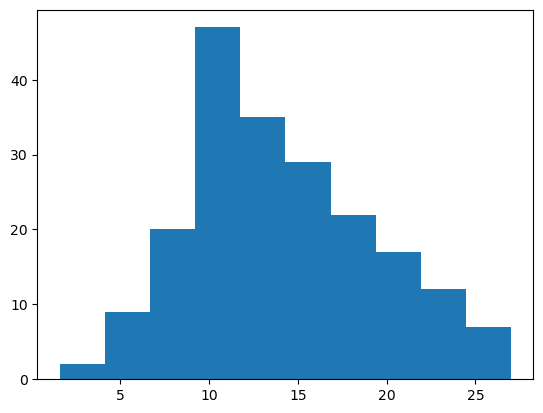

In [18]:
#ploting the graph for the target column

plt.hist(df['Sales'])

By observing the above graph we can say that our graph is left skeewed because most of the data lies in the right side of the graph and the left tail of the graph is skeewed. Hence we can say it as left-skeewed graph.

In [19]:
# finding the correlation between the data 

df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

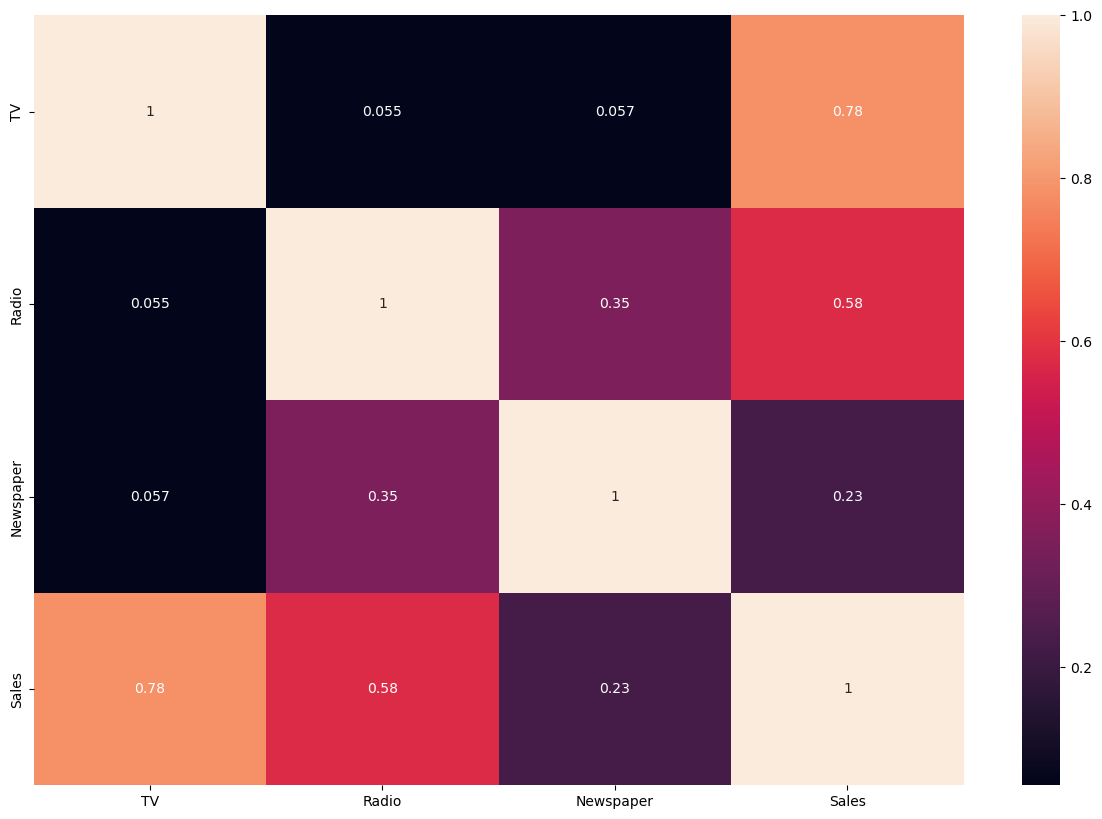

In [20]:
#visualizing the correlation of the data


f, ax = plt.subplots(figsize=(15,10))
corr = df.corr()
sns.heatmap(corr, ax=ax , annot = True)

By observing the above graph we can say that the 'TV' and 'Sales' variables are highly correlated to each other which means that the 'TV' and the 'Sales' variables explain how much the one variable is dependant on the other variable in a dataset.

Text(0.5, 1.0, 'Scatter Plot')

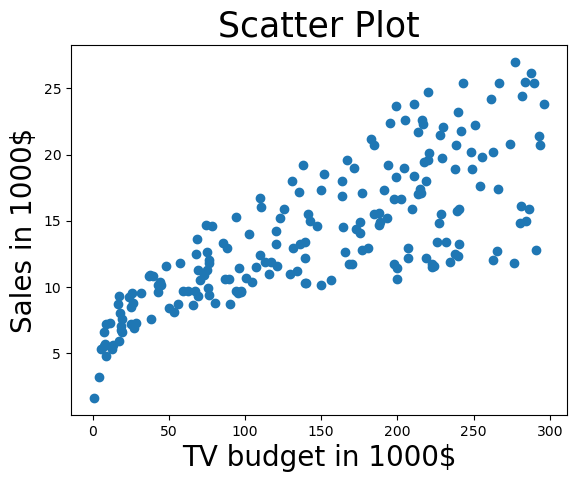

In [21]:
# drawing plot on the most correlated variables in the dataset 

x=df[['TV']].values  
y=df['Sales'].values 
plt.scatter(x,y)
plt.xlabel('TV budget in 1000$' ,fontsize=20)
plt.ylabel('Sales in 1000$',fontsize=20)
plt.title('Scatter Plot',fontsize=25)

In this plot we have taken two variables which are highly correlated to each other and plotted a scatter plot which describes that as the TV budget in 1000$ increases the sales in 1000$ also increases.

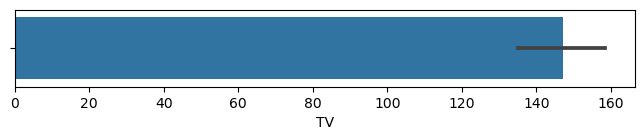

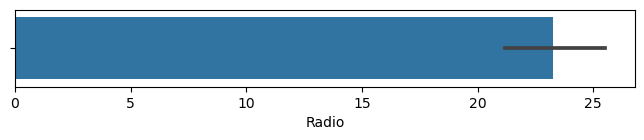

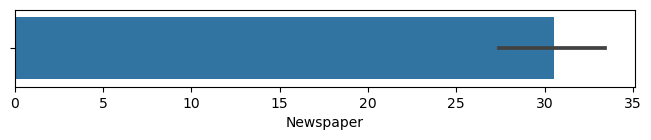

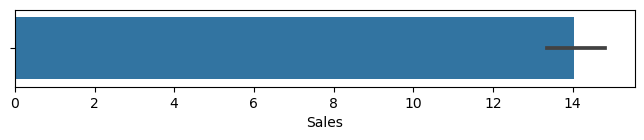

In [22]:
# Applying a box-plot to check the outliers

for column in df:
    plt.figure(figsize=(8,1))
    sns.barplot(data=df,x=column)

By considering the baove box-plot we can say that we are here checking for the outliers and our dataset may contain some outliers with-in it and we need to impute it.

In [23]:
# outlier treatment

def cap_data(df):
    for col in df.columns:
        print("capping the",col)
        if (((df[col].dtype)=='float64')|((df[col].dtype)=='int64')):
            percentiles = df[col].quantile([0.20,0.80]).values
            df[col][df[col] <= percentiles[0]] = percentiles[0]
            df[col][df[col] >= percentiles[1]] = percentiles[1]
        else:
            df[col]=df[col]
    return df
final_df = cap_data(df)


#UCL=Q3 + 1.5 * IQR

capping the TV
capping the Radio
capping the Newspaper
capping the Sales


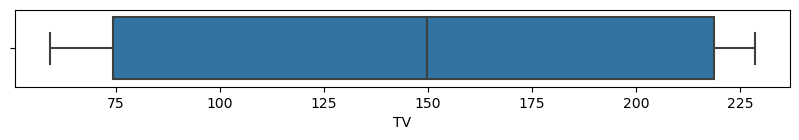

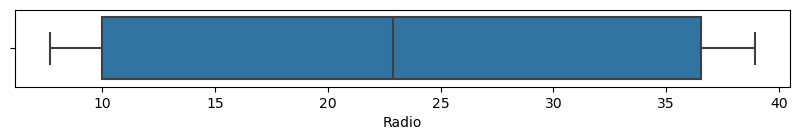

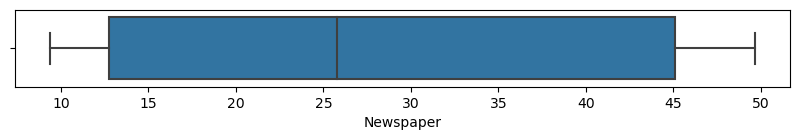

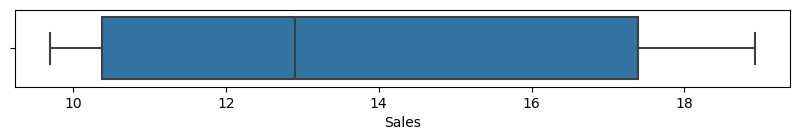

In [24]:
for column in final_df:
    plt.figure(figsize=(10,1))
    sns.boxplot(data=final_df,x=column)

We have done the outlier treatement and plot the box-plot again to check if there are any outliers left by the above graph we can say that our datasetb doesn't contain any outliers.

SEPARATING INPUT AND OUTPUT VARIABLES

In [25]:
# separating input columns from output column

X = df.loc[:,df.columns!="Sales"]

In [26]:
X

,TV,Radio,Newspaper
0,228.54,37.80,49.64
1,59.18,38.92,45.10
2,59.18,38.92,49.64
3,151.50,38.92,49.64
4,180.80,10.80,49.64
...,...,...,...
195,59.18,7.68,13.80
196,94.20,7.68,9.38
197,177.00,9.30,9.38
198,228.54,38.92,49.64


In [27]:
#considering only the output column

y=df["Sales"]

In [28]:
y

0      18.92
1      10.40
2       9.70
3      18.50
4      12.90
       ...  
195     9.70
196     9.70
197    12.80
198    18.92
199    13.40
Name: Sales, Length: 200, dtype: float64

TRAIN AND TEST DATA SPLIT

In [29]:
# importing train_test_split library 

from sklearn.model_selection import train_test_split

In [30]:
# Train-test data split with the test size of 30 and train size will be of 70

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)

In [31]:
#printing the size of the test and the train data

print('Training set shape: ', X_train.shape, y_train.shape)
print('Testing set shape: ', X_test.shape, y_test.shape)

Training set shape:  (140, 3) (140,)
Testing set shape:  (60, 3) (60,)


In [32]:
# importing StandardScaler library        
from sklearn.preprocessing import StandardScaler

In [33]:
# Applying the standardscaler to training data

sc = StandardScaler().fit(X_train)

In [34]:
# Transforming the training data into standard

X_train_std = sc.transform(X_train)

In [35]:
X_train_std

array([[-0.05624386, -0.70399927, -0.15859634],
       [-0.05476869, -0.68798031, -1.13969845],
       [-1.2366715 ,  0.54548015, -1.1906648 ],
       [ 1.26166923,  0.36927152, -1.19193895],
       [ 1.26166923,  1.26793556,  1.37294228],
       [-1.2366715 ,  1.26793556,  1.37294228],
       [-0.92659165, -1.23422708, -1.19193895],
       [-0.07542101,  1.26793556,  1.37294228],
       [ 1.24190201, -0.58385702,  1.37294228],
       [-1.2366715 ,  0.12097753, -1.19193895],
       [ 1.26166923,  0.45737583, -0.77656325],
       [ 1.0398043 ,  1.26793556,  0.36380868],
       [ 1.26166923,  1.26793556,  1.37294228],
       [-1.2366715 ,  1.106144  ,  1.09007908],
       [-1.2366715 ,  1.16221038, -0.41342806],
       [ 0.98227284, -0.19940181, -1.10784449],
       [-1.2366715 ,  0.96197329,  1.37294228],
       [-0.98264795, -1.23422708, -0.84664198],
       [ 1.26166923,  1.07410606,  1.37294228],
       [-0.02526537,  0.29718616,  1.15378701],
       [ 0.6606867 , -0.1593544 , -1.184

In [36]:
#importing the knn regressor 

from sklearn.neighbors import KNeighborsRegressor

#importing the necessary packages for error metrics

from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

Text(0.5, 1.0, 'ELBOW PLOT')

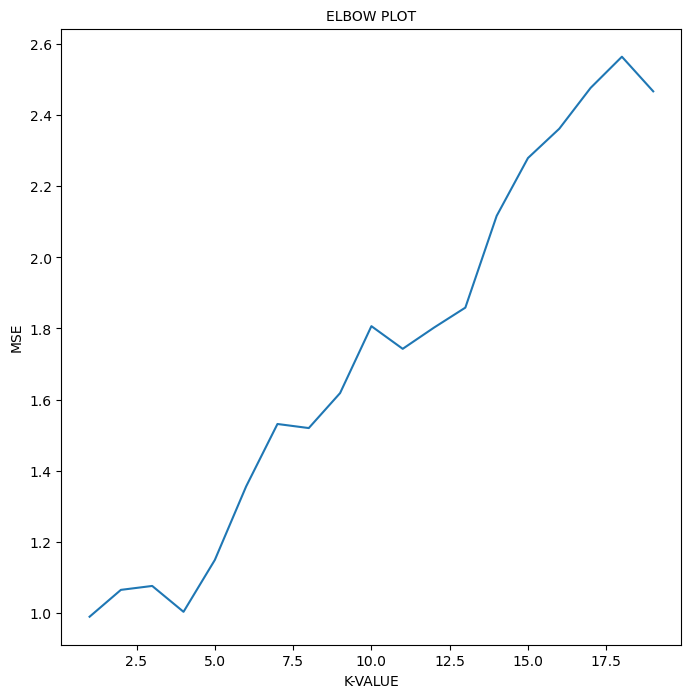

In [37]:
#plotting the graph based on k values and mse

fig,ax=plt.subplots(figsize=(8,8))
k_list=np.arange(1,20,1)
knn_dict={} # To store k and mse pairs
for i in k_list:
#Knn Model Creation
    knn=KNeighborsRegressor(n_neighbors=int(i))
    model=knn.fit(X_train,y_train)
    y_pred=model.predict(X_test)
#Storing MSE 
    mse=mean_squared_error(y_test,y_pred)
    knn_dict[i]=mse
#Plotting the results
ax.plot(knn_dict.keys(),knn_dict.values())
ax.set_xlabel('K-VALUE', fontsize=10)
ax.set_ylabel('MSE' ,fontsize=10)
ax.set_title('ELBOW PLOT' ,fontsize=10)

By the above graph we can say that at the k value '4' our means square error stops decreasing and started to increase this point is considered as the elbow point and here our k value can be taken as '4' for further predicting our model.

In [38]:
#mse-mean_squared_error is measuring the mean squared distance between the actual and the predicted values.

mse = mean_squared_error(y_test,y_pred)
mse

2.4674399999999994

In [39]:
#rmse-root_mean_squared_error is the root of the mean_squared_error.

rmse = sqrt(mse)
rmse

1.5708087089139784

In [40]:
#r2_score 

r2_score = r2_score(y_test,y_pred)
r2_score

0.7935293620008605

By the above r2_score we can say that 79% of the variance in the dependant variable is explained by the variance in the independent variable.

In [41]:
#building a model on knn regressor based on achieved k value

model = KNeighborsRegressor(n_neighbors=4, weights='distance') 
model

KNeighborsRegressor(n_neighbors=4, weights='distance')

In [42]:
#fitting the model the input and output train data

model.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=4, weights='distance')

In [43]:
#predicting the output values and printing it based on the input test data

y_pred = model.predict(X_test)

In [44]:
y_pred

array([18.92      , 15.01401538,  9.73531292, 12.0418071 , 16.14683354,
       18.92      , 17.71119366, 14.17315915, 10.0892783 , 17.87276578,
       16.23899734, 11.09133215, 17.17128961, 15.77886734, 12.6218708 ,
       17.09814418, 12.67680361, 13.2       , 10.7       , 16.98799403,
       10.31817437, 12.01658756,  9.7       , 11.15309124, 11.59008534,
       15.69311476, 11.27948603, 18.13374314, 17.43420506, 14.56117795,
       18.92      , 12.81861598, 15.26179403, 13.24430625, 18.91609792,
       15.51974544, 12.58424748, 11.21186647, 18.92      ,  9.81890916,
        9.7       , 10.22999562,  9.7       , 18.75112264,  9.86104469,
       13.60719266, 13.64294677, 18.92      , 17.48476108, 18.92      ,
       18.92      , 14.76070014,  9.7       , 18.46906732, 18.04541964,
       12.09031726, 13.12838777,  9.7       , 13.83170235, 10.11811943])

In [45]:
#comparing the predicted and the actual values and printing it.

predicted_df = pd.DataFrame({"Y_Test" : y_test, "y_Predicted" : y_pred})

In [46]:
predicted_df

,Y_Test,y_Predicted
58,18.92,18.920000
40,16.60,15.014015
34,9.70,9.735313
102,14.80,12.041807
184,17.60,16.146834
198,18.92,18.920000
95,16.90,17.711194
4,12.90,14.173159
29,10.50,10.089278
168,17.10,17.872766


In [47]:
#mse-mean_squared_error after predicting the output values.

mse = mean_squared_error(y_test,y_pred)
mse

0.7817959918101973

In [48]:
#rmse-root_mean_squared_error after predicting the output values.

rmse = sqrt(mse)
rmse

0.8841922821480616

In [49]:
#r2_score after predicting the output values.
from sklearn.metrics import r2_score
from math import sqrt

r2_score = r2_score(y_test,y_pred)
r2_score

0.9345808136310421

In [50]:
#checking the model score 

score=model.score(X,y)
print(score)

0.9805493531529841


CONCLUSSION :
    
    
    By looking at the overall project we can conclude that the product 'TV' has the highest advertising budget compared to the other two products that is 'Newspaper' and 'Radio'. The "ELBOW MWTHOD" is used here to caluculate the best value for 'K' and then the model has been fitted to it which gives the mse of 0.7817959918101973 and rmse of 0.8841922821480616 which gives the most least error or the low error rate and r2_score of 0.9345808136310421 by this we can say that the 93% of the dependant variable variance is explained by the variance in the independent variable and a model accuracy score of 0.9805493531529841.